First few rows of the dataset:
   feature1  feature2  feature3  feature4
0  0.496714  1.399355 -0.675178 -1.907808
1 -0.138264  0.924634 -0.144519 -0.860385
2  5.497572 -2.596716 -0.792420 -0.413606
3  1.523030 -0.646937 -0.307962  1.887688
4 -0.234153  0.698223 -1.893615  0.556553

First few rows of the labels:
0    0
1    0
2    1
3    0
4    0
dtype: int32

Confusion Matrix:
[[288   0]
 [  0  12]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00        12

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



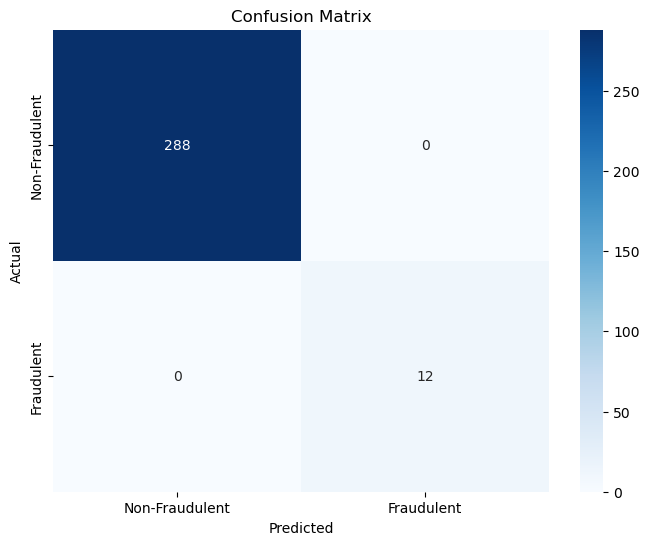

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a synthetic dataset
np.random.seed(42)  # For reproducibility
data_size = 1000

# Generate synthetic features
X = pd.DataFrame({
    'feature1': np.random.normal(0, 1, data_size),
    'feature2': np.random.normal(0, 1, data_size),
    'feature3': np.random.normal(0, 1, data_size),
    'feature4': np.random.normal(0, 1, data_size)
})

# Generate synthetic labels (0 = non-fraudulent, 1 = fraudulent)
y = np.random.choice([0, 1], size=data_size, p=[0.95, 0.05])

# Introduce some fraud-related patterns for better demonstration
X.loc[y == 1, 'feature1'] += np.random.normal(5, 1, np.sum(y == 1))
X.loc[y == 1, 'feature2'] += np.random.normal(-5, 1, np.sum(y == 1))

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(X.head())
print("\nFirst few rows of the labels:")
print(pd.Series(y).head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()